# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2020</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 2. Hay un notebook por ejercicio planteado.

* [Ejercicio 2 - Redes Neuronales](#Ejercicio2) (40 puntos)

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
# from numba import jit

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


<a id="Ejercicio2"></a>
# Ejercicio 2


In [2]:
# funciones auxiliares (Ejecutar y seguir)
def error_relativo(x, y):
    ''' devuelve el error relativo'''
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def calcular_gradiente_numerico_array(f, x, df, h=1e-5):
    '''
    Evalúa el gradiente numérico para una función que acepta un arreglo numpy y
    devuelve un arreglo numpy.
    '''
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad


def calcular_gradiente_numerico(f, x, verbose=True, h=0.00001):
    '''
    Evalúa el gradiente numérico de f en x
    - f es una función que recibe un solo argumento
    - x es el punto (numpy array) en que se evalúa el gradiente
    '''
    
    # se inicializa el gradiente 
    grad = np.zeros_like(x)
    # se define un iterador sobre todos los elementos de x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # se evalúa la función en x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # se suma h al valor original de x
        fxph = f(x) # se evalúa f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # se evalúa f(x - h)
        x[ix] = oldval # se restaura el valor original de x

        # se calcula la derivada parcial con la fórmula centrada
        grad[ix] = (fxph - fxmh) / (2 * h) 
        if verbose:
            print(ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

## Descripción del ejercicio

En este ejercicio se implementarán algunos de los bloques constitutivos de una red neuronal de **tres capas multiclase**. La figura muestra el diagrama de bloques para la red de tres capas que se implementará. 

<img src="img/red_tres_capas_multiclase.png" alt="drawing" width="700"/>

A continuación se describen los bloques:
- **Inicializar parámetros:** Inicializa los parámentros de la red. A los pesos de la capa $l$ de la red les llamaremos $W_l$, $b_l$ con $l=1,2,3$. 
- **Propagación hacia adelante:** La *propagación hacia adelante*  o *forward propagation* consiste en estimar la salida de la red a partir de la entrada. Cada nodo o capa de la red tiene un método *forward* asociado. Se proveen las implementaciones de los métodos forward asociados a los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
        
- **Loss:** Calcula el valor de la función de costo a optimizar. Se implementará como función de costo:
        - Entropía cruzada multiclase (Softmax Loss)

- **Propagación hacia atrás:** Durante la *propagación hacia atrás* o *backpropagation* se calculan los gradientes necesarios para actualizar los parámetros de la red. Se implementarán métodos *backward* para los siguientes bloques:
        - Afin
        - Activación 
        - Afin --> Activación
- **Update:** Es el boque encargado de actualizar los parámetros. Para ello utiliza los gradientes calculados durante la *propagación hacia atrás* y un método de optimización. Se utilizará *descenso por gradiente* como método de optimización.

## 1- Bloque de Inicialización

Se implementará el bloque de inicialización para el caso de una red neuronal de **tres capas** con la siguiente estructura:    
  Afin --> Activación 1 --> Afin --> Activacion 2 --> Afin --> Softmax        

### Ejercicio 2 - parte a)  
Completar la implementación de `inicializar_pesos()`. Los pesos $W_l$ serán inicializados en valores aleatorios con distribución gaussiana de desviación estandar $\sigma_l=1/\sqrt{d_{l-1}}$, siendo $d_{l-1}$ el número de nodos de la capa $l-1$. Por ejemplo, para la primera capa $l=1$, la cantidad de nodos $d_{l-1}=d_0$ corresponde a la dimensión del vector de características. Los pesos correspondientes a términos de *bias* se inicializarán a cero. 

**Nota:** No necesario realizar una implementación genérica. Alcanza con que funcione para una red de tres capas.

In [3]:
def inicializar_pesos(dims, semilla=1):
    """
    Entrada:
        dims: lista que contiene el número de nodos de cada una de las capas. El primer elemento
              corresponde al tamaño del vector de características y el último a la cantidad de 
              nodos en la última capa oculta.
        semilla: semilla a utilizar para generar los valores aleatorios
    
    Salida:
        parametros: diccionario de python que contiene los parámetros inicializados 
                    parametros['W' + str(l)] = ... 
                    parametros['b' + str(l)] = ...
    """
    
    np.random.seed(semilla)
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    # Sugerencia: puede ser útil utilizar np.randn() y ajustar la desviación estándar
    
    W1 = (1/np.sqrt(dims[0])) * np.random.randn(dims[0], dims[1])
    W2 = (1/np.sqrt(dims[1])) * np.random.randn(dims[1], dims[2])
    W3 = (1/np.sqrt(dims[2])) * np.random.randn(dims[2], dims[3])
    
    b1 = np.zeros(dims[1])
    b2 = np.zeros(dims[2])
    b3 = np.zeros(dims[3])
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
   
    # Se genera el diccionario con los valores inicializados
    parametros = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
                  'W3': W3,
                  'b3': b3}
    
    return parametros    

In [4]:
# Se testea la inicialización con pesos aleatorios
dims = [3,6,3,1]
parametros = inicializar_pesos(dims)

W1_correcto = np.array([[ 0.93781623, -0.35319773, -0.3049401 , -0.61947872,  0.49964333, -1.32879399],
                       [ 1.00736754, -0.43948301,  0.18419731, -0.14397405,  0.84414841, -1.18942279],
                         [-0.18614766, -0.22173389,  0.65458209, -0.63502252, -0.09955147, -0.50683179]])
b1_correcto = np.array([0., 0., 0., 0., 0., 0.])
W2_correcto = np.array([[ 0.01723369,  0.23793331, -0.4493259 ],[ 0.4673315 ,  0.36807287,  0.20514245],
                       [ 0.3677729 , -0.27913073, -0.05016972], [-0.38202627, -0.10936485,  0.21651671],
                       [-0.28236932, -0.16197395, -0.28053708], [-0.34505376, -0.27403509, -0.0051703 ]])
b2_correcto = np.array([0., 0., 0.])  
W3_correcto = np.array([[-0.64507943],
       [ 0.13533997],
       [ 0.95828723]])
b3_correcto = np.array([0.])

# Se compara la salida con la nuestra. El error debería ser e-7 o menos.
print('Testeando la incialización aleatoria:')
print('Diferencia en W1: ', error_relativo(parametros['W1'], W1_correcto))
print('Diferencia en b1: ', error_relativo(parametros['b1'], b1_correcto))
print('Diferencia en W2: ', error_relativo(parametros['W2'], W2_correcto))
print('Diferencia en b2: ', error_relativo(parametros['b2'], b2_correcto))
print('Diferencia en W3: ', error_relativo(parametros['W3'], W3_correcto))
print('Diferencia en b3: ', error_relativo(parametros['b3'], b3_correcto))

Testeando la incialización aleatoria:
Diferencia en W1:  1.1841719957328453e-08
Diferencia en b1:  0.0
Diferencia en W2:  8.297892749808612e-08
Diferencia en b2:  0.0
Diferencia en W3:  1.3902130737322008e-08
Diferencia en b3:  0.0


## 2- Bloques Forward

Se proveen las implementaciones de los métodos *forward* de los siguientes bloques: 

- Bloque Afin  
- Bloque Activación donde la activación puede ser ReLU, Sigmoide
- Bloque Afin -> Activación  

### 2.1 - Forward Afin

La señal de entrada a la activación de la capa $\textit{l}$ puede escribirse como:

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

donde $\mathbf{s}^{(l)}$ y $\mathbf{b}^{(l)}$ son vectores de tamaño $d^{(l)}$, $\mathbf{x}^{(l-1)}$  es un vector de tamaño $d^{(l-1)}$ y $W^{(l)}$ es una matriz de tamaño $d^{(l-1)} \times d^{(l)}$.

La ecuación (1) es válida cuando la entrada a la capa es un único vector $\mathbf{x}^{(l-1)}$. En la práctica es más habitual procesar un $\textit{batch}$ de vectores de entrada a la vez, por lo tanto es deseable contar con una expresión que genere la salida para todos los vectores de entrada a la vez. Al evitar la utilización de un bloque $\textit{for}$ que itere por cada una de las muestras del $\textit{batch}$ se mejora la eficiencia de la implementación.   


La versión de la ecuación (1) que actúa sobre un conjunto de muestras a la vez es la siguiente:

$$
S^{(l)} = X^{(l-1)}W^{(l)} +\mathbf{b}^{(l)}\tag{2}
$$

donde $X^{[0]} = X$, siendo X una matriz que contiene un vector de características en cada fila.

In [5]:
def afin_forward(X, W, b):
    """
    Implementa la propagación hacia adelante en una capa afin.

    Entrada:
        X: arreglo de tamaño (N, dim capa anterior) que en cada fila contiene un vector de
           activaciones de la capa anterior (o datos de entrada)
        W: arreglo de pesos de tamaño (dim de capa anterior, dim de capa actual) 
        b: vector de bias de tamaño (dim de la capa actual,)

    Salida:
        S: arreglo de tamaño (N, dim de capa actual) que contiene
           los scores o señal de entrada a la activación  
        cache: (X, W, b) tupla que contiene X, W y b. 
               Son almacenados para calcular el paso backward eficientemente
    """

    S = np.dot(X, W) + b
    
    assert(S.shape == (X.shape[0], W.shape[1] ))
    cache = (X, W, b)
    
    return S, cache

### 2.2 - Funciones de activación

Se proveen las implementaciones de las siguientes funciones de activación:

- **Sigmoide**: $\sigma(S) = \sigma(X W  + \mathbf{b}) = \frac{1}{ 1 + e^{-(X W  + b)}}$. Esta función devuelve, además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = sigmoid(S)
```


- **Rectified Linear Unit**:  $ReLU(S) = \max(0, S)$.  Al igual que en el caso de la activación sigmoide, esta función devuelve además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = relu(S)
```

In [6]:
def sigmoide(S):
    """
    Implementa la activación sigmoide
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de sigmoid(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    """

    X = 1/(1+np.exp(-S))
    cache = S

    assert X.shape == S.shape, 'La entrada y la salida deben ser del mismo tamaño'
    return X, cache

In [7]:
def relu(S):
    '''
    Implementa la activación relu
    
    Entrada:
        S: arreglo numpy que contiene las entradas a la activación. 
           Las dimensiones de entrada no están definidas.
    
    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de relu(S) 
    cache: devuelve S para utilizar durante la propagación hacia atrás
    '''
    
    X = np.maximum(0,S)
    
    assert(X.shape == S.shape)
    cache = S 
        
    return X, cache

### 2.3 - Aplicación conjunta de capa afin y activación

Se provee la implementación de la propagación hacia adelante de una capa *Afin->Activacion*. El método `afin_activacion_forward()` implementa la operación:

$$
X^{[l]} = \theta(S^{(l)}) = \theta(X^{(l-1)}W^{(l)} + \mathbf{b}^{(l)})  \tag{3}
$$

donde la activación $\theta(\cdot)$ será alguna de las implementadas. 

In [8]:
def afin_activacion_forward(X_prev, W, b, activacion):
    """
    Implementa la propagación hacia adelante para una capa Afin->Activación 
    Entrada:
        X_prev: arreglo de tamaño (N, dim capa anterior) que contiene la 
                activación de la capa anterior (o datos de entrada):          
        W: matriz de pesos de tamaño (dim de capa anterior, dim de capa actual)  
        b: vector de bias de tamaño (dim de la capa actual)
        activacion: la activacion a utilizar en esta capa se indica con uno de los 
                    siguientes strings: 'sigmoide', 'tanh' o 'relu'

    Salida:
        X: arreglo de tamaño (N, dim de capa actual) que contiene la salida 
           de la función de activación  
    cache: tupla que contiene "cache_afin" y "cache_activacion".
           Se almacenan para calcular la propagación hacia atrás eficientemente
    """
    

    S, cache_afin = afin_forward(X_prev,W,b)
    
    if activacion == 'sigmoide':    
        
        X, cache_activacion = sigmoide(S)
    
    elif activacion == 'relu':
        
        X, cache_activacion = relu(S)
    
    assert (X.shape == (X_prev.shape[0], W.shape[1]))
    cache = (cache_afin, cache_activacion)

    return X, cache

## 3 - Función de costo

En esta sección se implementará el bloque `softmax_loss()`, muy utilizado para problemas de clasificación multiclase. Dentro del mismo se realizan dos operaciones: 

1. Se aplica la no linealidad softmax sobre los scores entrantes

$$
\mathbf{x}^{(L)} = softmax(\mathbf{s}^{(L)}) = \sigma_s({\mathbf{s}^{(L)}})  = \frac{\exp(\mathbf{s}^{(L)})}{\sum_{k=1}^{K} \exp(s^{(L)}_k)}  \tag{4}
$$

Observar que esta operación da como resultado un vector con valores entre cero y uno, cuya suma es uno. Es habitual que cada componente de la salida del softmax se interprete como la probabilidad de pertenencer a una clase.

2. Se utiliza como función de costo la entropía cruzada multiclase. Cuando se tienen etiquetas codificadas con vectores *one-hot*, la salida ideal en el paso anterior para una muestra $\mathbf{x}_i$ perteneciente a la clase $y_i$,  es un vector que vale uno en la componente $y_i$ y cero en las demás. La entropía cruzada es una función de costo que puede ser utilizada para cuantificar cuanto se aparta la salida del softmax de la salida ideal. Si se llama  $\mathbf{x}^{(L)}$ al vector de probabilidades brindado por el softmax  y $\mathbf{y^{oh}}$ al vector etiqueta codificado mediante *one-hot*, la entropía cruzada se define como

$$
H(\mathbf{\mathbf{x}^{(L)}}, \mathbf{y^{oh}})= - \sum\limits_{k = 0}^{K-1}  y^{oh}_k\log x^{(L)}_k  = - \log x^{(L)}_{y_i}  \tag{5}
$$

donde K es el número de clases. Notar que en la última igualdad se utilizó que el único término de la sumatoria que sobrevive es el $k$ para el cual $y^{oh}_k$ es distinto de cero, es decir, la componente de la etiqueta $y_i$. Si llamamos $L_i$ al costo asociado a la muestra $i$, entonces se tiene que:

$$
L_i = - \log x^{(L)}_{y_i} = - \log \left( \sigma_s \left(\mathbf{s}_i^{(L)} \right) \right)_{y_i}  \tag{6}
$$

### Ejercicio 2 - parte b)  

Argumentar que la derivada del costo $L_i$ respecto a la *l-ésima* componente de $\mathbf{s}^{(L)}$ (entrada al bloque `softmax_loss`) es:

$$
\frac{\partial L_i}{\partial s^{(L)}_l} = \begin{cases}
                                                \sigma_s({s^{(L)}_l})  \qquad  \qquad \forall l \neq y_i  \\
                                                \sigma_s({s^{(L)}_l}) - 1  \qquad  \text{  si } l=y_i
                                     \end{cases} 
$$

**Sugerencia:** Utilizar que la derivada parcial de la *j-ésima* componente de la salida del softmax respecto a la *l-esima* entrada se calcula de la siguiente manera:

\begin{align}
\frac{\partial }{\partial s_l} \sigma_s({s_j}) & = \frac{\partial }{\partial s_l} \frac{\exp(s_j)}{\sum_{k=0}^{K-1} \exp(s_k)} \\
& = \frac{ \frac{\partial \exp(s_j)}{\partial s_l} \sum_{k=0}^{K-1} \exp(s_k) - \exp(s_j) \frac{\partial \sum_{k=0}^{K-1} \exp(s_k)  }{\partial s_l}  } { \left( \sum_{k=0}^{K-1} \exp(s_k) \right) ^2} \\
& = \frac{ \exp(s_j) \delta_{jl} \sum_{k=0}^{K-1} \exp(s_k)  - \exp(s_j) \exp(s_l)} { \left( \sum_{k=0}^{K-1} \exp(s_k) \right) ^2}  \\
& = \sigma_s({s_j}) \delta_{jl} - \sigma_s({s_j})\sigma_s({s_l})  \\
& = \sigma_s({s_j}) \left( \delta_{jl} - \sigma_s({s_l}) \right) 
\end{align}

donde $\delta_{jl}$ vale uno cuando $j$ es igual a $l$ y cero en caso contrario.

**Resupuesta:**    

$$ \frac{\partial L_i}{\partial s_l^{(L)}} = \frac{\partial}{\partial s_l^{(L)}} \left(-\log\left(\sigma_s(s_i^{(L)})\right)\right) = -\frac{\frac{\partial\sigma_s(s_i^{(L)})}{\partial s_i^{(L)}}}{\sigma_s(s_i^{(L)})}
$$

Usando que
$
\frac{\partial }{\partial s_l} \sigma_s({s_j}) = \sigma_s({s_j}) \left( \delta_{jl} - \sigma_s({s_l}) \right) 
$:

$$
    \frac{\partial L_i}{\partial s_l^{(L)}} = - \frac{\sigma_s(s_i^{(L)}) \left( \delta_{il} - \sigma_s(s_i^{(L)}) \right)}{\sigma_s(s_i^{(L)})} = \sigma_s(s_i^{(L)}) - \delta_{il} $$

### Ejercicio 2 - parte c)  

Implementar el bloque `softmax_loss()`. El costo asociado a un conjunto de $N$ muestras se define como:

$$
L = \frac{1}{N}\sum_{i=0}^{N-1}L_i
$$

**IMPORTANTE:** En esta parte dejar comentado el *@jit* que aparece sobre el encabezado de la función. La sentencia es un decorador que cuando está activa indica que la función será compilada para su posterior ejecución. 
Mas adelante se le pedirá entrenar la red. Si el entrenamiento le demora mucho, pruebe: i) descomentar el @jit ii) ejecutar nuevamente la celda que implementa el `softmax_loss` iii) entrenar nuevamente la red. 

In [9]:
def softmax(S):
    N, K = S.shape
    soft_max = np.empty((N,K))
    for i in range(N):
        soft_max[i] = np.exp(S[i])
        soft_max[i] = soft_max[i] / np.sum(soft_max[i])
    return soft_max

In [10]:
#@jit
def softmax_loss(S, y):
    '''
    Implementa softmax sobre los scores para generar probabilidades de pertenencia a cada clase y luego
    utiliza la entropía cruzada como función de costo
    
    Entrada:
       S: arreglo de dimensión (N, K) que contiene los scores que ingresan a la capa softmax
       y: arreglo de tamaño (N,) que contiene las etiquetas
    Salida:
       costo: escalar con el costo correspondiente a la entropía cruzada
       dS: Gradiente del costo respecto a los scores
    '''
    N = S.shape[0]
    K = S.shape[1]
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    exp_S = np.exp(S)
    
    soft_max = np.empty((N,K))
    for i in range(N):
        soft_max[i] = np.exp(S[i])
        soft_max[i] = soft_max[i] / np.sum(soft_max[i])
    
    costo = 0
    
    dS = soft_max.copy()
    for n, i in enumerate(y):
        costo += -np.log(soft_max[n, i]) 
        dS[n, i] = dS[n,i] - 1
        
    costo /= N
    dS /= N
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################    
       
    return costo, dS

In [11]:
# Test de afin_backward
np.random.seed(43)
Np = 20
n_classes = 9
S_ = np.random.randn(Np, n_classes)
y_ = np.random.randint(n_classes, size=Np)

dS_num = calcular_gradiente_numerico(lambda S: softmax_loss(S, y_)[0], S_, verbose = False)

costo, dS = softmax_loss(S_, y_)

assert np.isscalar(costo), 'El costo debe ser un escalar'
assert np.allclose(costo, 2.626917569953734), 'Revisar el cálculo del costo'
# El error debería ser del orden de e-8 o menos
print('Testing softmax_loss():')
print('dS error: ', error_relativo(dS_num, dS))

Testing softmax_loss():
dS error:  1.7064105082388883e-08


## 4 - Propagación hacia atrás

Se implementará la versión *backward* de cada una de las funciones *forward* implementadas anteriormente. A saber:
- AFIN backward
- ACTIVACION backward 
- AFIN -> ACTIVACION backward donde ACTIVACION puede ser *ReLU* o *sigmoide* 

### 4.1 - Afin backward

Durante la propagación hacia adelante en la capa $l$ (sin considerar la activación) se calcula para una muestra: 

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

Si se llama $e_n$ al costo debido a la muesta $n$ y se asume conocido el *vector de sensibilidad* $\delta^{(l)}=\frac{\partial e_n}{\partial \mathbf{s}^{(l)}}$, en el teórico del curso se vio que 

$$
\frac{\partial{e_n}}{\partial{W^{(l)}}}=\mathbf{x}^{(l-1)} \left( \delta^{(l)} \right)^T
$$

Análogamente a como se hizo en el caso de la propagación hacia adelante, si se considera la contribución al error de un conjunto de muestras a la vez la ecuación se puede escribir en forma vectorizada como:

$$
\frac{\partial{E}}{\partial{W^{(l)}}}= dW^{(l)} = \left( X^{(l-1)}\right)^ T dS^{(l)}   \tag{5}
$$

donde $dS^{(l)}$ es una matríz de tamaño $N\times d^{(l)}$ que en cada fila contiene el vector de sensibilidad $\delta^{(l)}_n$ correspondiente a una de las muestras.

Las derivadas respecto al vector de bias $\mathbf{b}^{(l)}$ se calculan de forma similar (puede pensarse como un caso particular en que $X^{(l-1)}$ es un vector columna de unos) por lo que

$$
\frac{\partial{E}}{\partial{\mathbf{b}^{(l)}}}= d\mathbf{b}^{(l)} =\mathbb{1} ^ T dS^{(l)}  \tag{6}
$$

Finalmente se calcula la influencia de cada una de las características en el error. Considerando primero el caso de una muestra, se tiene que:

$$
\frac{\partial{e_n}}{\partial{\mathbf{x}^{(l-1)}}} = W^{(l)} \delta^{(l)}
$$

que en forma vectorizada puede escribirse como:

$$ 
 \frac{\partial E }{\partial X^{(l-1)}} = dX^{(l-1)} = dS^{(l)} \left( W^{(l) }\right)^T \tag{7}
$$

### Ejercicio 2 - parte d)  
Implementar el método `afin_backward()`.

In [12]:
def afin_backward(dS, cache):
    """
    Implementa la propagación hacia atrás para una capa l (sin considerar la activación)

    Entrada:
        dS: Gradiente de la función de costo con respecto a la salida de la capa actual 
            (sin considerar la activación)
        cache: tupla de valores (X_prev, W, b) calculados durante la propagación hacia adelante
               de la capa actual

    Salida:
        dX_prev: Gradiente de la función de costo con respecto a la activación de la capa anterior (l-1), 
                 tiene el mismo tamaño que X_prev
        dW: Gradiente de la función de costo con respecto a W (de la capa actual l), 
            tiene el mismo tamaño que W
        db: Gradiente de la función de costo con respecto a b (de la capa actual l), 
            tiene el mismo tamaño que b
    """
    X_prev, W, b = cache
    N = X_prev.shape[0]

    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    
    dX_prev = dS @ W.T
    
    dW = X_prev.T @ dS
    
    db = np.sum(dS, axis=0)
    
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

    assert (dX_prev.shape == X_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dX_prev, dW, db

In [13]:
# Test de afin_backward
np.random.seed(43)
x = np.random.randn(10, 6)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

#dx_num = calcular_gradiente_numerico_array(lambda x: afin_forward(x, w, b)[0], x, dout)
dx_num = calcular_gradiente_numerico_array(lambda xx: afin_forward(xx, w, b)[0], x, dout)

dw_num = calcular_gradiente_numerico_array(lambda ww: afin_forward(x, ww, b)[0], w, dout)
db_num = calcular_gradiente_numerico_array(lambda bb: afin_forward(x, w, bb)[0], b, dout)

_, cache = afin_forward(x, w, b)
dx, dw, db = afin_backward(dout, cache)

# El error debería ser del orden de e-9 o menos
print('Testing afin_backward():')
print('dx error: ', error_relativo(dx_num, dx))
print('dw error: ', error_relativo(dw_num, dw))
print('db error: ', error_relativo(db_num, db))

Testing afin_backward():
dx error:  3.669042497648924e-09
dw error:  3.7482312588464514e-11
db error:  1.6407816267560523e-11


### 4.2 - Activación backward

Si  $\theta(\cdot)$ es la función de activación, entonces su función *backward* se calcula 

$$
dS^{(l)} = dX^{(l)} * \theta'(S^{(l)})   \tag{8}
$$

donde $\theta'(\cdot)$ debe ser calculado para cada caso. 

### Ejercicio 2 - parte e)  
Implementar los métodos *backward* de cada una de las funciones de activación implementadas

In [14]:
def sigmoide_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación Sigmoide.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa sigmoide,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Returns:
    dS -- Gradiente del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    tita_magico = np.exp(-S) / ((1+np.exp(-S))**2)
     
    dS = dX * tita_magico
    
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape), 'dS y S no tienen el mismo tamaño'
    assert (dX.shape == S.shape), 'dX y S no tienen el mismo tamaño'
    
    return dS

In [15]:
# Test de sigmoid_backward
np.random.seed(231)
S = np.random.randn(10, 10)
dout = np.random.randn(*S.shape)

dS_num = calcular_gradiente_numerico_array(lambda S: sigmoide(S)[0], S, dout)

_, cache = sigmoide(S)
dS = sigmoide_backward(dout, cache)

# El error debería ser del orden de e-10 o menos
print('Testing sigmoide_backward():')
print('dS error: ', error_relativo(dS_num, dS))


Testing sigmoide_backward():
dS error:  3.44651192693257e-11


In [16]:
def relu_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación ReLu.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa relu,
              el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Returns:
    dS -- Gradiente del costo respecto a S
    """
    
    S = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    # se inicializa dS con las dimensiones adecuadas.
    
    # Cuando s <= 0, dS es igual a cero. 
    dS = (S > 0) * dX 
    
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    assert (dS.shape == S.shape)
    
    return dS

In [17]:
# Test de relu_backward
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dS_num = calcular_gradiente_numerico_array(lambda x: relu(x)[0], x, dout)

_, cache = relu(x)
dS = relu_backward(dout, cache)

# El error debería ser del orden de e-12
print('Testing relu_backward():')
print('dS error: ', error_relativo(dS_num, dS))


Testing relu_backward():
dS error:  3.2756349136310288e-12


### 4.3 - Afin --> Activacion backward

A continuación se implementará la función que realiza la propagación hacia atrás del la capa *Afin-->Activacion*. 

### Ejercicio 2 - parte f)  
Implementar la función `afin_activacion_backward()`. Para ello utilizar las funciones implementadas anteriormente: `afin_backward` y la `activacion_backward` que corresponda. 


In [18]:
def afin_activacion_backward(dX, cache, activacion):
    '''
    Implementar la propagación hacia atrás para la capa Afin->Activacion.
    
    Entradas:
        dX: gradiente del costo respecto a la salida de la capa actual 
        cache: tupla con los valores(cache_afin, cache_activacion) 
        activacion: la activación a utilizar en esta capa, puede ser 'sigmoide' o 'relu'
    Salidas:
        dX_prev: Gradiente del costo con respecto a la activación de la capa anterior(l-1), 
                 tiene las mismas dimensiones que X_prev
        dW -- Gradiente del costo con respecto a W (de la capa actual l), 
              tiene las mismas dimensiones que W
        db -- Gradiente del costo con respecto a b (de la capa actual l), 
              tiene las mismas dimensiones que b
    '''
    cache_afin, cache_activacion = cache
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    

    if activacion == "sigmoide":
        dS = sigmoide_backward(dX, cache_activacion)
    elif activacion == "relu":
        dS = relu_backward(dX, cache_activacion)
    
    dX_prev, dW, db = afin_backward(dS, cache_afin)
    
    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    return dX_prev, dW, db

In [19]:
np.random.seed(231)
x = np.random.randn(2, 12)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

activaciones = ['relu', 'sigmoide']

for activacion in activaciones:
    out, cache = afin_activacion_forward(x, w, b, activacion)
    dx, dw, db = afin_activacion_backward(dout, cache, activacion)

    dx_num = calcular_gradiente_numerico_array(lambda x: afin_activacion_forward(x, w, b, activacion)[0], x, dout)
    dw_num = calcular_gradiente_numerico_array(lambda w: afin_activacion_forward(x, w, b, activacion)[0], w, dout)
    db_num = calcular_gradiente_numerico_array(lambda b: afin_activacion_forward(x, w, b, activacion)[0], b, dout)

    # Los errores deberían ser del orden de e-9 o menos
    print('Testing afin_' + activacion + '_forward y afin_' + activacion + '_backward:')
    print('dx error: ', error_relativo(dx_num, dx))
    print('dw error: ', error_relativo(dw_num, dw))
    print('db error: ', error_relativo(db_num, db))

Testing afin_relu_forward y afin_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12
Testing afin_sigmoide_forward y afin_sigmoide_backward:
dx error:  1.2457054025023588e-10
dw error:  2.7821293383972562e-09
db error:  1.5238194515875374e-10


##  5 - Actualización de los parámetros

En esta sección se actualizarán los parámetros del modelo mediante el método de *descenso por gradiente*:

$$ W^{(l)} = W^{(l)} -\eta \text{ } dW^{(l)} \tag{9}$$
$$ \mathbf{b}^{(l)} = \mathbf{b}^{(l)} -\eta \text{ } \mathbf{db}^{(l)} \tag{10}$$

donde $\eta$ es el *learning rate*. 

### Ejercicio 2 - parte g)  
Implementar `actualizar_parametros()` para actualizar los parámetros usando *descenso por gradiente*. Luego de actualizar los parámetros, almacenarlos en el diccionario de parámetros. 

In [20]:
def actualizar_parametros(parametros, gradientes, learning_rate):
    """
    Se actualizan los parámetros utilizando descenso por gradiente. Si bien en este notebook se trabaja 
    con una red de tres capas, el método se implementa en forma genérica.
    
    Entrada:
        parametros: diccionario de python que contiene los parámetros 
                        parametros["W" + str(l)] = ... 
                        parametros["b" + str(l)] = ...
        gradientes: diccionario de python que contiene los gradientes 
                    (las salidas de los métodos backward)
                        gradientes["W" + str(l)] = ... 
                        gradientes["b" + str(l)] = ...
    
    Salida:
        parametros: diccionario de python que contiene los parámetros actualizados 
                    parametros["W" + str(l)] = ... 
                    parametros["b" + str(l)] = ...
    """
    
    L = len(parametros) // 2 # número de capas en la red neuronal
    
    # Se actualiza cada uno de los parámetros. En el caso de una red profunda de L capas
    # se hace con un loop que va recorriendo cada parámetro
    for l in range(1,L+1):
        
        ####################################################################################
        ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        
        parametros["W"+str(l)] = parametros["W"+str(l)] - learning_rate*gradientes["W"+str(l)]
        parametros["b"+str(l)] = parametros["b"+str(l)] - learning_rate*gradientes["b"+str(l)]
        
        ####################################################################################
        ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
    
    return parametros

# Clasificación de dígitos

En esta sección se utilizarán los bloques implementados para clasificar dígitos. A continuación se levantan los dígitos y se los divide en conjunto de entrenamiento y test. 

In [21]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
N, d = X.shape
N_train = 1000
indices = np.random.permutation(N)
X_train, y_train = X[indices[:N_train]], y[indices[:N_train]]
X_val, y_val = X[indices[N_train:]], y[indices[N_train:]]

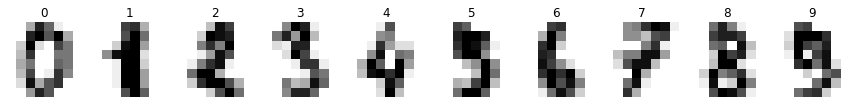

In [22]:
_, axes = plt.subplots(1, 10, figsize=(12,30))
for ind, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(X[ind].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % y[ind])
plt.tight_layout()

Para clasificar los datos sintéticos se utilizará una red de **tres capas** con la siguiente arquitectura:   

*Afin->Relu->Afin->Relu-->Afin-->Softmax* 

### Ejercicio 2 - parte h)  
Completar la implementación del método `red_tres_capas()` utilizando los métodos *forward* y *backward* adecuados para dicha arquitectura. 

In [23]:
def red_tres_capas(X, Y, dims_capas, num_iter = 1000, learning_rate = 1,
                    mostrar_costo=False, semilla=100):
    """
    Implementa una red neuronal de tres capas: Afin->Relu->Afin->Relu->Afin->Softmax.
    
    Entrada:
        X: datos de entrada, de tamaño (N, d_0)
        Y: etiquetas (1 para la clase positiva y 0 para la negativa), de tamaño (N,1)
        dims_capas: dimensiones de las capas(d_0, d_1, d_2, d_3)
        num_iter: número de iteraciones del loop de optimización
        learning_rate: learning rate utilizado para la actualización mediante descenso por gradiente
        mostrar_costo: Si vale True, se muestra el costo cada 100 iteraciones 
        semilla: semilla utilizada para la generación de números aleatorios
    Salida:
        parametros: un diccionario de python que contiene W1, W2, W3, b1, b2 and b3
    """
    
    np.random.seed(semilla)
    gradientes = {} # se inicializa el diccionario que almacena los gradientes
    costos = []     # lista que almacena el costo
    N = X.shape[0]  # número de muestras
    
    # Se inicializan los parámetros del diccionario llamando a una de las 
    # funciones previamente implementadas
    parametros = inicializar_pesos(dims_capas, semilla=semilla)
     
    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    # Loop (descenso por gradiente)

    for i in range(0, num_iter):

        ####################################################################################
        ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        
        # Propagación hacia adelante: Afin -> Relu -> Afin -> Relu -> Afin -> Softmax. 
        # Entradas: "X, W1, b1". Salidas: "X1, cache1, X2, cache2, X3, cache3".
        X1, cache1 = afin_activacion_forward(X, W1, b1, "relu")
        X2, cache2 = afin_activacion_forward(X1, W2, b2, "relu")
        
        # afin actiavacion del Softmax
        S3, cache3_activacion_afin = afin_forward(X2, W3, b3)
        
        # Se calcula el costo y se inicia la propagación hacia atrás
        costo, dS3 = softmax_loss(S3, Y)
        
        # Propagación hacia atrás. 
        # Entradas: "dX3, cache3, cache2, cache1". 
        # Salidas: "dX2, dW3, db3, dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
        dX2, dW3, db3 = afin_backward(dS3, cache3_activacion_afin)
        dX1, dW2, db2 = afin_activacion_backward(dX2, cache2, "relu")
        dX0, dW1, db1 = afin_activacion_backward(dX1, cache1, "relu")
        
        
        # Se almacenan los gradientes recientemente calculados en el diccionario 
        
        gradientes["W1"] = dW1
        gradientes["b1"] = db1
        gradientes["W2"] = dW2
        gradientes["b2"] = db2
        gradientes["W3"] = dW3
        gradientes["b3"] = db3
        
        
        # Se actualizan los parámetros
        parametros = actualizar_parametros(parametros, gradientes, learning_rate)
        
        # Se obtienen los nuevos W1, b1, W2, b2, W3 y b3 del diccionario de parámetros.        
        W1 = parametros["W1"]
        b1 = parametros["b1"]
        W2 = parametros["W2"]
        b2 = parametros["b2"]
        W3 = parametros["W3"]
        b3 = parametros["b3"]
        
        
        
        ####################################################################################
        ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
        ####################################################################################
        # Se muestra la evolución del costo cada 100 iteraciones
        if mostrar_costo and i % 500 == 0:
            print("Costo luego de iteracion {}: {}".format(i, np.squeeze(costo)))

        if mostrar_costo and i % 500 == 0:
            costos.append(costo)
    
    # se muestra el costo
    if mostrar_costo:    
        plt.plot(np.squeeze(costos))
        plt.ylabel('costo')
        plt.xlabel('iteraciones (sobre 100)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parametros

In [24]:
### Se definen las constantes que determinan la arquitectura de la red ####
d_0 = X_train.shape[1]   
d_1 = 6
d_2 = 15
d_3 = 10

Costo luego de iteracion 0: 10.167046093160646
Costo luego de iteracion 500: 0.670786126592026
Costo luego de iteracion 1000: 0.14320750023689757
Costo luego de iteracion 1500: 0.09339820521615107
Costo luego de iteracion 2000: 0.06870529133954482
Costo luego de iteracion 2500: 0.052425841942246275
Costo luego de iteracion 3000: 0.042048985312972416
Costo luego de iteracion 3500: 0.03464532558639826
Costo luego de iteracion 4000: 0.029673694475873775
Costo luego de iteracion 4500: 0.02549274496306334


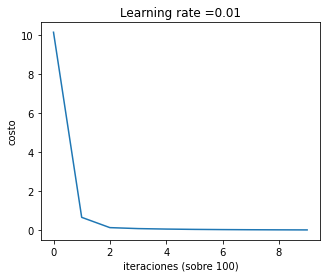

In [25]:
# Se entrena la red, con los parámetros por defecto el costo debería ser alrededor de 10.17 en la iteración 0 y 
# menor a 0.15 en la 1000
# ATENCION: En caso de que le demore mucho el entrenamiento pruebe descomentar 
# el decorador @jit del método softmax_loss() e inténtelo nuevamente.
parametros_red_3capas = red_tres_capas(X_train, y_train, dims_capas = [d_0, d_1, d_2, d_3], 
                                    learning_rate = 1e-2, num_iter = 5000, mostrar_costo=True)

### Ejercicio 2 - parte i)  
Completar la implementación del método `clasificar_digito()` y utilizarla para clasificar los dígitos con los conjuntos de entrenamiento y test. 

In [152]:
def clasificar_digito(X, parametros):
    """
    Esta función clasifica los dígitos utilizando una red neuronal de tres capas. 
    
    Entrada:
        X: matriz de tamaño Nx64 que en cada fila contiene un digito
        parametros: parametros del modelo ya entrenado
    
    Salida:
        p : vector de tamaño N que contiene las predicciones realizadas
    """
    
    # Se obtienen W1, b1, W2, b2, W3 y b3 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    W3 = parametros["W3"]
    b3 = parametros["b3"]
    
    N = X.shape[0]
    p = np.zeros((N,1))
    
    ####################################################################################
    ###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################
    
    # Se hace la propagación hacia adelante de los datos de entrada X. Tener en cuenta que la
    # arquitectura utilizada en la red fue Afin-->Relu-->Afin-->Relu-->Afin-->Softmax
    # ~ 3 lineas de codigo
    X1, cache1 = afin_activacion_forward(X, W1, b1, "relu")
    X2, cache2 = afin_activacion_forward(X1, W2, b2, "relu")

    # afin actiavacion del Softmax
    S3, cache3_activacion_afin = afin_forward(X2, W3, b3)
    X3 = softmax(S3)
    
    
    # Se obtienen las predicciones. 
    # ~ 1 linea de codigo
    p = X3.argmax(axis=1)

    
    ####################################################################################
    ###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
    ####################################################################################

        
    return p

In [153]:
predicciones_train = clasificar_digito(X_train, parametros_red_3capas)
predicciones_val = clasificar_digito(X_val, parametros_red_3capas)

### Ejercicio 2 - parte j)  

Calcule el porcentaje de aciertos en entrenamiento y validación y verifique en ambos casos es superior al 90\%.

In [154]:
####################################################################################
###########  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################
    
porcentaje_aciertos_train = np.mean(predicciones_train == y_train) * 100

porcentaje_aciertos_val = np.mean(predicciones_val == y_val)*100

####################################################################################
###########  TERMINA ESPACIO PARA COMPLETAR CODIGO  ################################
####################################################################################

In [155]:
print('El porcentaje de aciertos con los datos de entrenamiento es %f' % porcentaje_aciertos_train)
print('El porcentaje de aciertos con los datos de validación es %f' % porcentaje_aciertos_val)

El porcentaje de aciertos con los datos de entrenamiento es 99.600000
El porcentaje de aciertos con los datos de validación es 91.718946


### Ejercicio 2 - parte k)  

Ejecute la siguiente celda y explique en qué consisten las medidas *precision* y *recall*.

In [156]:
print("Classification report for classifier:\n%s\n"
      % (classification_report(y_val, predicciones_val)))

Classification report for classifier:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.83      0.91      0.87        81
           2       0.99      0.97      0.98        73
           3       0.92      0.88      0.90        94
           4       0.94      0.93      0.94        73
           5       0.91      0.91      0.91        77
           6       0.93      0.98      0.95        84
           7       0.93      0.93      0.93        80
           8       0.82      0.84      0.83        77
           9       0.94      0.87      0.90        86

    accuracy                           0.92       797
   macro avg       0.92      0.92      0.92       797
weighted avg       0.92      0.92      0.92       797




**Respuesta:**   
...